In [1]:
from typing import List, Callable

import numpy as np
import pandas as pd

from experiments.common import (
    run_increasing_size_neighborhoods_experiments,
)
from experiments.data.synthetic_benchmarks import benchmark_plane_1, benchmark_plane_2

%load_ext autoreload
%autoreload 2

# Experiments in dense heteroscedastic settings with increasing window size
The following are plots and metrics for a number of experimental settings with dense 2D predictors with heteroscedastic noise comparing the proposed Robust Local Polynomial Regression with Similarity Kernels method with LOWESS, robust LOWESS, kernel regression, local polynomial and RBF network regression. The plots are interactive and allows to hide and show different elements by clicking or double-clicking as well as to zoom in on areas of interest.

In [2]:
extreme_noise_ratio: float = 0.35
high_noise_ratio: float = 0.25
medium_noise_ratio: float = 0.15
mild_noise_ratio: float = 0.05
hetero: bool = True
num_points: int = 100

bw1_f: Callable[[np.ndarray], List[float]] = (
    lambda data: [float(1 / np.clip(a=0.1 * data.shape[0], a_min=2.0, a_max=27.0))] * data.shape[1]
)

size_neighborhoods: List[int] = [5, 7, 9, 11, 13, 15] + np.linspace(
    start=20, stop=num_points, num=10, endpoint=True
).astype(int).tolist()

methods = ["rsklpr", "kernel_reg_ll", "kernel_reg_lc", "local_quad", "rbfnet"]

## Plane 1

### Mild noise

Best performing method is local_quad for size_neighborhood w_13


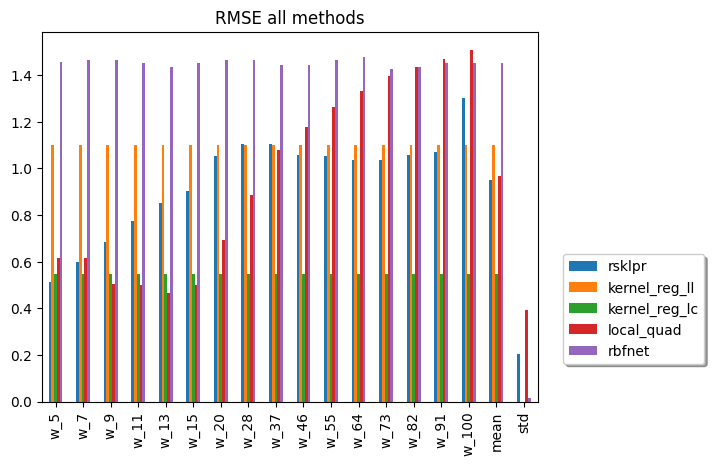

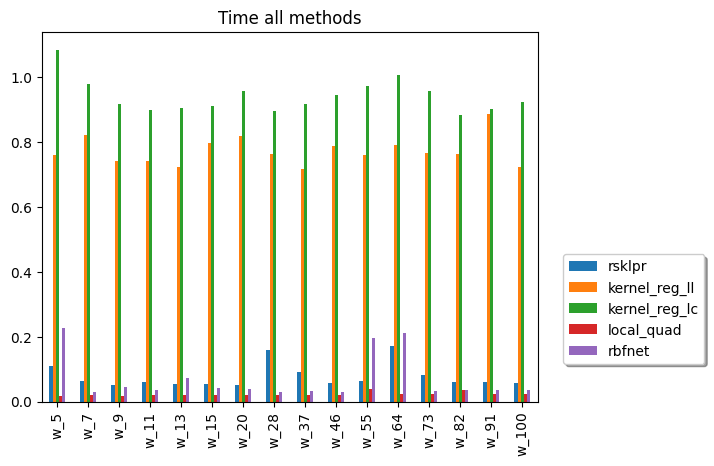

In [3]:
best_for_window: pd.DataFrame
worst_for_window: pd.DataFrame
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [4]:
best_for_window

method      rmse
w_5           rsklpr  0.512630
w_7    kernel_reg_lc  0.545006
w_9       local_quad  0.504301
w_11      local_quad  0.498716
w_13      local_quad  0.466614
w_15      local_quad  0.501936
w_20   kernel_reg_lc  0.545006
w_28   kernel_reg_lc  0.545006
w_37   kernel_reg_lc  0.545006
w_46   kernel_reg_lc  0.545006
w_55   kernel_reg_lc  0.545006
w_64   kernel_reg_lc  0.545006
w_73   kernel_reg_lc  0.545006
w_82   kernel_reg_lc  0.545006
w_91   kernel_reg_lc  0.545006
w_100  kernel_reg_lc  0.545006

In [5]:
worst_for_window

method      rmse
w_5        rbfnet  1.456153
w_7        rbfnet  1.465017
w_9        rbfnet  1.465017
w_11       rbfnet  1.450174
w_13       rbfnet  1.434893
w_15       rbfnet  1.451604
w_20       rbfnet  1.465565
w_28       rbfnet  1.465017
w_37       rbfnet  1.444355
w_46       rbfnet  1.445017
w_55       rbfnet  1.465017
w_64       rbfnet  1.479108
w_73       rbfnet  1.424529
w_82   local_quad  1.436224
w_91   local_quad  1.467329
w_100  local_quad  1.509903

### Medium noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


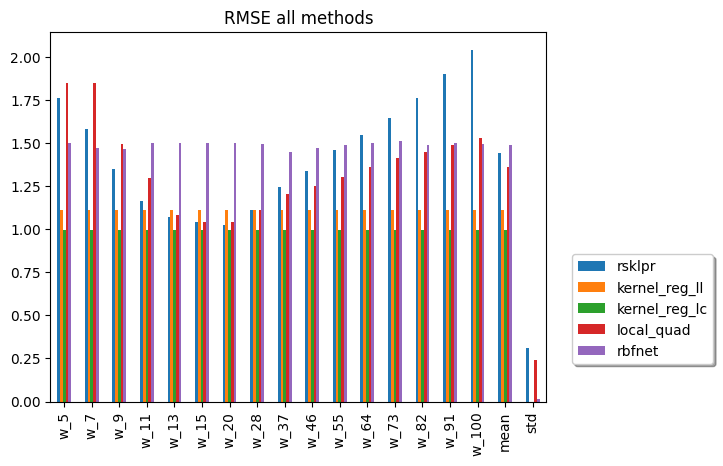

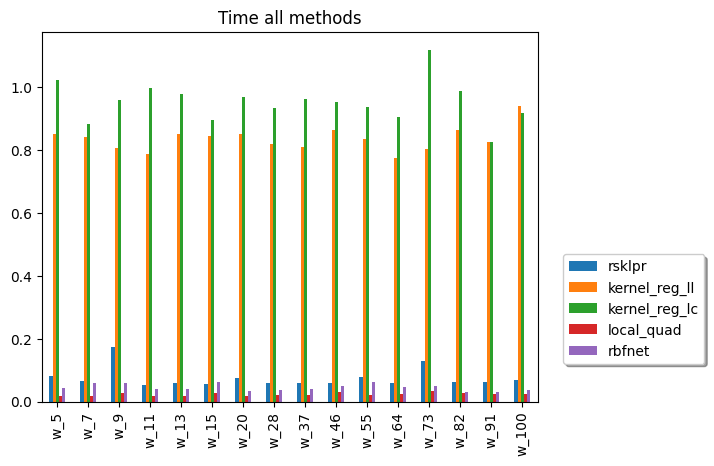

In [6]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [7]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.996675
w_7    kernel_reg_lc  0.996675
w_9    kernel_reg_lc  0.996675
w_11   kernel_reg_lc  0.996675
w_13   kernel_reg_lc  0.996675
w_15   kernel_reg_lc  0.996675
w_20   kernel_reg_lc  0.996675
w_28   kernel_reg_lc  0.996675
w_37   kernel_reg_lc  0.996675
w_46   kernel_reg_lc  0.996675
w_55   kernel_reg_lc  0.996675
w_64   kernel_reg_lc  0.996675
w_73   kernel_reg_lc  0.996675
w_82   kernel_reg_lc  0.996675
w_91   kernel_reg_lc  0.996675
w_100  kernel_reg_lc  0.996675

In [8]:
worst_for_window

method      rmse
w_5    local_quad  1.852213
w_7    local_quad  1.852213
w_9    local_quad  1.493668
w_11       rbfnet  1.502865
w_13       rbfnet  1.501997
w_15       rbfnet  1.502261
w_20       rbfnet  1.501997
w_28       rbfnet  1.495714
w_37       rbfnet  1.450992
w_46       rbfnet  1.474692
w_55       rbfnet  1.492020
w_64       rsklpr  1.548865
w_73       rsklpr  1.647612
w_82       rsklpr  1.760898
w_91       rsklpr  1.902260
w_100      rsklpr  2.044465

### High noise

Best performing method is rsklpr for size_neighborhood w_13


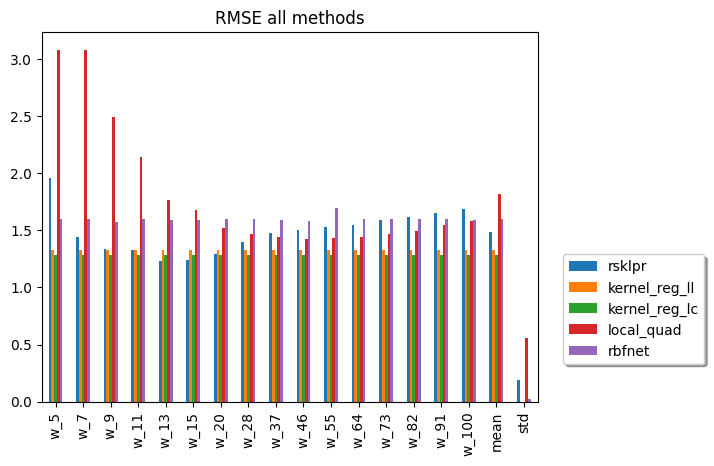

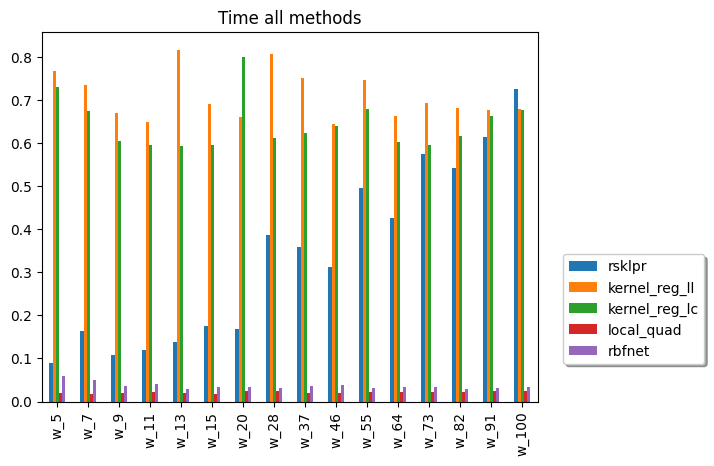

In [9]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [10]:
best_for_window

method      rmse
w_5    kernel_reg_lc  1.287850
w_7    kernel_reg_lc  1.287850
w_9    kernel_reg_lc  1.287850
w_11   kernel_reg_lc  1.287850
w_13          rsklpr  1.229135
w_15          rsklpr  1.237370
w_20   kernel_reg_lc  1.287850
w_28   kernel_reg_lc  1.287850
w_37   kernel_reg_lc  1.287850
w_46   kernel_reg_lc  1.287850
w_55   kernel_reg_lc  1.287850
w_64   kernel_reg_lc  1.287850
w_73   kernel_reg_lc  1.287850
w_82   kernel_reg_lc  1.287850
w_91   kernel_reg_lc  1.287850
w_100  kernel_reg_lc  1.287850

In [11]:
worst_for_window

method      rmse
w_5    local_quad  3.086868
w_7    local_quad  3.086868
w_9    local_quad  2.493664
w_11   local_quad  2.148103
w_13   local_quad  1.765648
w_15   local_quad  1.676609
w_20       rbfnet  1.598219
w_28       rbfnet  1.597839
w_37       rbfnet  1.591262
w_46       rbfnet  1.587330
w_55       rbfnet  1.699089
w_64       rbfnet  1.597489
w_73       rbfnet  1.598330
w_82       rsklpr  1.614387
w_91       rsklpr  1.651900
w_100      rsklpr  1.691882

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_20


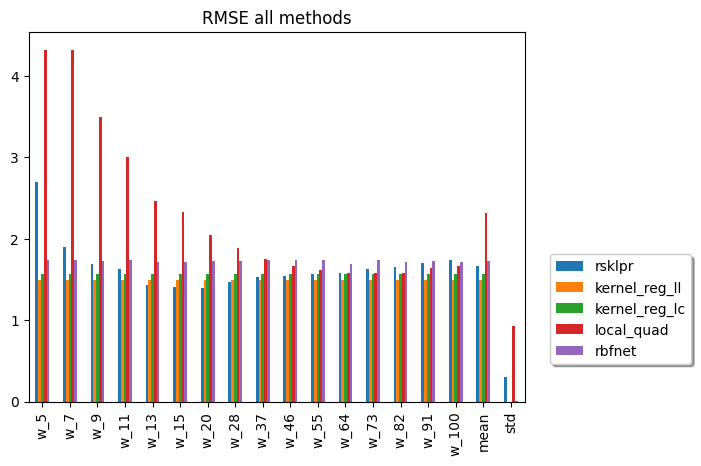

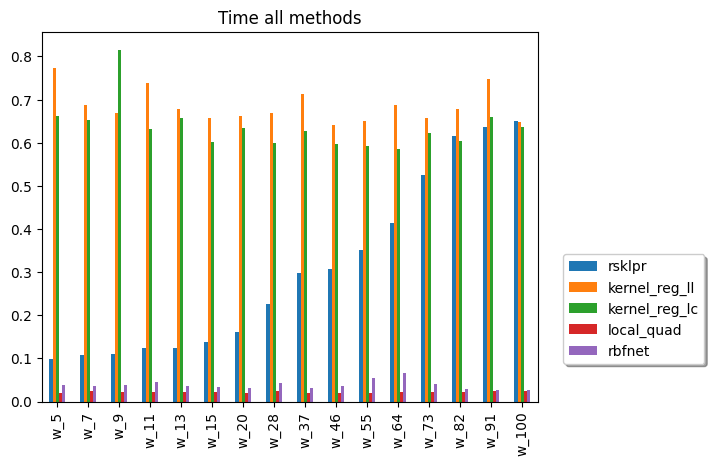

In [12]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [13]:
best_for_window

method      rmse
w_5    kernel_reg_ll  1.493713
w_7    kernel_reg_ll  1.493713
w_9    kernel_reg_ll  1.493713
w_11   kernel_reg_ll  1.493713
w_13          rsklpr  1.436242
w_15          rsklpr  1.401826
w_20          rsklpr  1.387965
w_28          rsklpr  1.471277
w_37   kernel_reg_ll  1.493713
w_46   kernel_reg_ll  1.493713
w_55   kernel_reg_ll  1.493713
w_64   kernel_reg_ll  1.493713
w_73   kernel_reg_ll  1.493713
w_82   kernel_reg_ll  1.493713
w_91   kernel_reg_ll  1.493713
w_100  kernel_reg_ll  1.493713

In [14]:
worst_for_window

method      rmse
w_5    local_quad  4.321524
w_7    local_quad  4.321524
w_9    local_quad  3.495176
w_11   local_quad  3.002379
w_13   local_quad  2.463215
w_15   local_quad  2.330156
w_20   local_quad  2.048741
w_28   local_quad  1.882351
w_37   local_quad  1.750903
w_46       rbfnet  1.732056
w_55       rbfnet  1.732279
w_64       rbfnet  1.684100
w_73       rbfnet  1.731672
w_82       rbfnet  1.715881
w_91       rbfnet  1.720455
w_100      rsklpr  1.738031

## Plane 2

### Mild noise

Best performing method is local_quad for size_neighborhood w_37


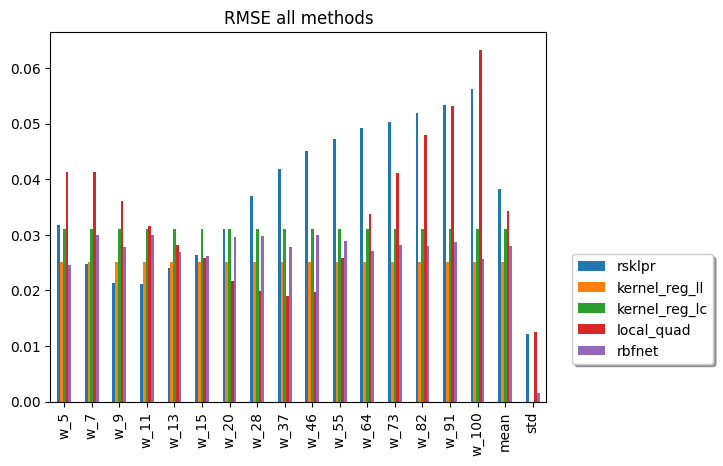

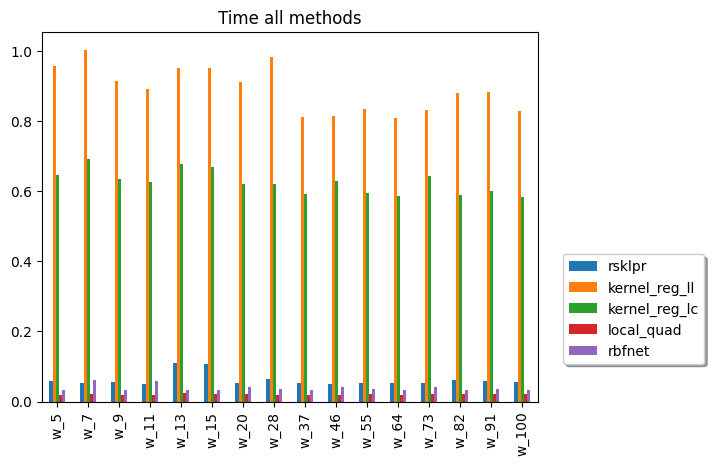

In [15]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [16]:
best_for_window

method      rmse
w_5           rbfnet  0.024589
w_7           rsklpr  0.024738
w_9           rsklpr  0.021312
w_11          rsklpr  0.021097
w_13          rsklpr  0.024060
w_15   kernel_reg_ll  0.025032
w_20      local_quad  0.021657
w_28      local_quad  0.019932
w_37      local_quad  0.019032
w_46      local_quad  0.019624
w_55   kernel_reg_ll  0.025032
w_64   kernel_reg_ll  0.025032
w_73   kernel_reg_ll  0.025032
w_82   kernel_reg_ll  0.025032
w_91   kernel_reg_ll  0.025032
w_100  kernel_reg_ll  0.025032

In [17]:
worst_for_window

method      rmse
w_5       local_quad  0.041300
w_7       local_quad  0.041300
w_9       local_quad  0.036140
w_11      local_quad  0.031485
w_13   kernel_reg_lc  0.030978
w_15   kernel_reg_lc  0.030978
w_20          rsklpr  0.031038
w_28          rsklpr  0.036897
w_37          rsklpr  0.041757
w_46          rsklpr  0.044985
w_55          rsklpr  0.047150
w_64          rsklpr  0.049175
w_73          rsklpr  0.050272
w_82          rsklpr  0.051857
w_91          rsklpr  0.053271
w_100     local_quad  0.063315

### Medium noise

Best performing method is local_quad for size_neighborhood w_55


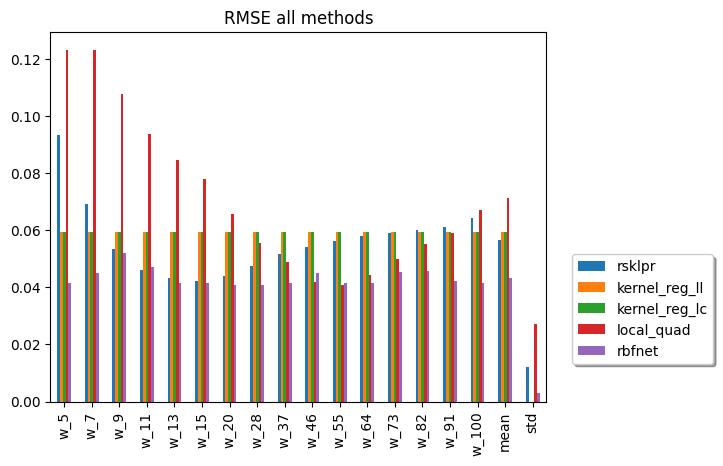

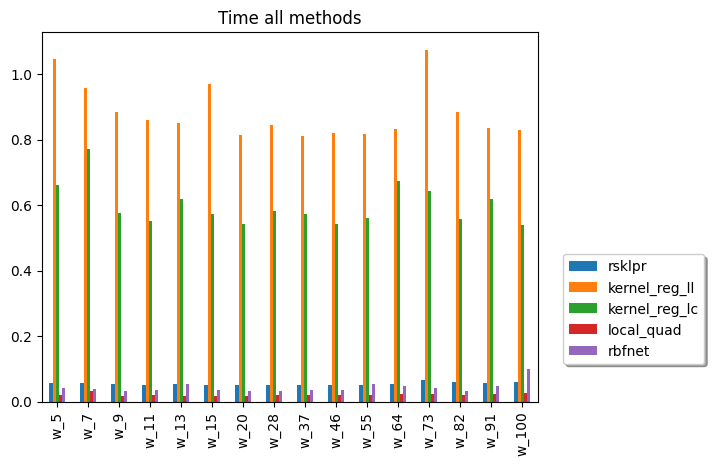

In [18]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [19]:
best_for_window

method      rmse
w_5        rbfnet  0.041465
w_7        rbfnet  0.045048
w_9        rbfnet  0.052014
w_11       rsklpr  0.046116
w_13       rbfnet  0.041511
w_15       rbfnet  0.041425
w_20       rbfnet  0.040902
w_28       rbfnet  0.040979
w_37       rbfnet  0.041456
w_46   local_quad  0.041957
w_55   local_quad  0.040850
w_64       rbfnet  0.041464
w_73       rbfnet  0.045562
w_82       rbfnet  0.045905
w_91       rbfnet  0.042348
w_100      rbfnet  0.041431

In [20]:
worst_for_window

method      rmse
w_5       local_quad  0.123405
w_7       local_quad  0.123405
w_9       local_quad  0.107820
w_11      local_quad  0.093876
w_13      local_quad  0.084664
w_15      local_quad  0.077887
w_20      local_quad  0.065816
w_28   kernel_reg_ll  0.059548
w_37   kernel_reg_ll  0.059548
w_46   kernel_reg_ll  0.059548
w_55   kernel_reg_ll  0.059548
w_64   kernel_reg_ll  0.059548
w_73   kernel_reg_ll  0.059548
w_82          rsklpr  0.059978
w_91          rsklpr  0.061019
w_100     local_quad  0.067108

### High noise

Best performing method is rsklpr for size_neighborhood w_20


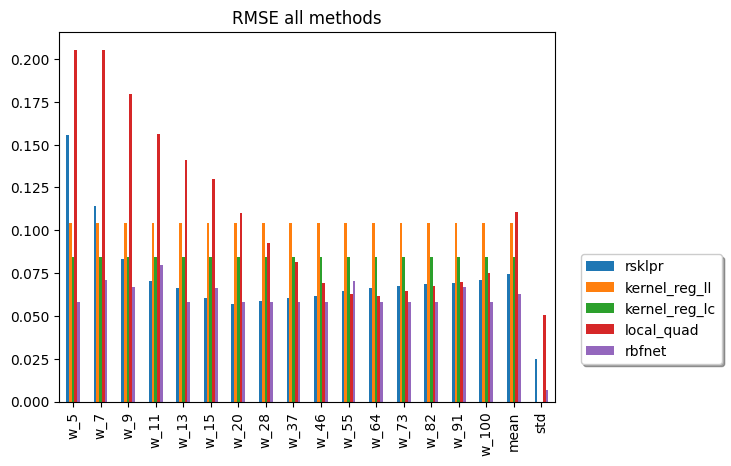

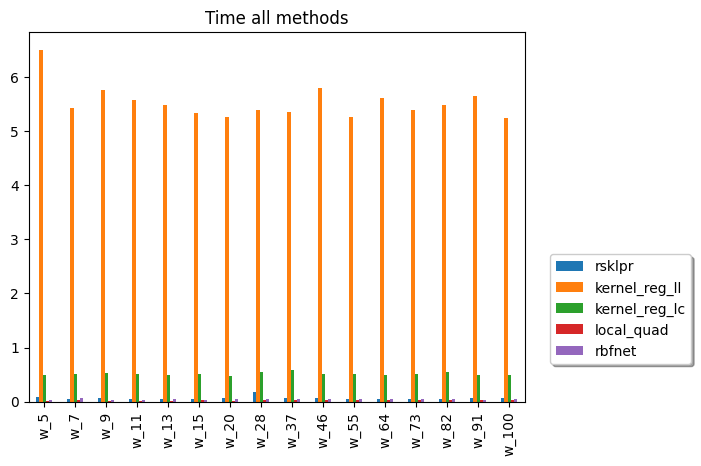

In [21]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [22]:
best_for_window

method      rmse
w_5        rbfnet  0.058022
w_7        rbfnet  0.070810
w_9        rbfnet  0.066845
w_11       rsklpr  0.070258
w_13       rbfnet  0.057994
w_15       rsklpr  0.060712
w_20       rsklpr  0.056968
w_28       rbfnet  0.057954
w_37       rbfnet  0.057980
w_46       rbfnet  0.057986
w_55   local_quad  0.062632
w_64       rbfnet  0.057976
w_73       rbfnet  0.057981
w_82       rbfnet  0.057983
w_91       rbfnet  0.066901
w_100      rbfnet  0.057982

In [23]:
worst_for_window

method      rmse
w_5       local_quad  0.205512
w_7       local_quad  0.205512
w_9       local_quad  0.179502
w_11      local_quad  0.156273
w_13      local_quad  0.141151
w_15      local_quad  0.130002
w_20      local_quad  0.110176
w_28   kernel_reg_ll  0.104457
w_37   kernel_reg_ll  0.104457
w_46   kernel_reg_ll  0.104457
w_55   kernel_reg_ll  0.104457
w_64   kernel_reg_ll  0.104457
w_73   kernel_reg_ll  0.104457
w_82   kernel_reg_ll  0.104457
w_91   kernel_reg_ll  0.104457
w_100  kernel_reg_ll  0.104457

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_37


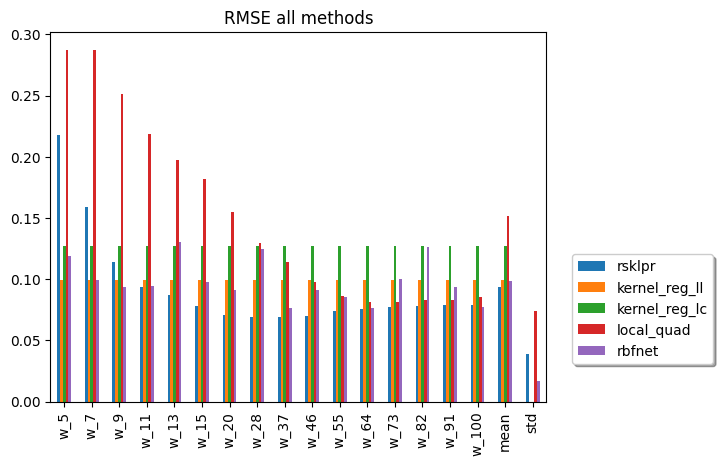

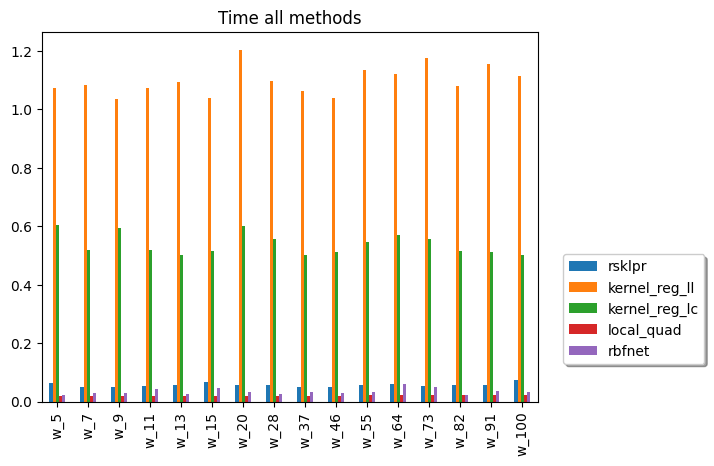

In [24]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [25]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.099211
w_7    kernel_reg_ll  0.099211
w_9           rbfnet  0.093563
w_11          rsklpr  0.093805
w_13          rsklpr  0.086923
w_15          rsklpr  0.077861
w_20          rsklpr  0.070498
w_28          rsklpr  0.069283
w_37          rsklpr  0.069206
w_46          rsklpr  0.070260
w_55          rsklpr  0.074043
w_64          rsklpr  0.075867
w_73          rsklpr  0.076957
w_82          rsklpr  0.077667
w_91          rsklpr  0.078560
w_100         rbfnet  0.077171

In [26]:
worst_for_window

method      rmse
w_5       local_quad  0.287618
w_7       local_quad  0.287618
w_9       local_quad  0.251185
w_11      local_quad  0.218670
w_13      local_quad  0.197641
w_15      local_quad  0.182122
w_20      local_quad  0.154565
w_28      local_quad  0.129480
w_37   kernel_reg_lc  0.127087
w_46   kernel_reg_lc  0.127087
w_55   kernel_reg_lc  0.127087
w_64   kernel_reg_lc  0.127087
w_73   kernel_reg_lc  0.127087
w_82   kernel_reg_lc  0.127087
w_91   kernel_reg_lc  0.127087
w_100  kernel_reg_lc  0.127087